In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib
import copy
import glob

from palettable.colorbrewer.sequential import YlGnBu_9
from palettable.scientific.sequential import Davos_8
from palettable.scientific.sequential import Oslo_16
from numba import jit
nside = 4
from matplotlib import rc
rc('text', usetex=False)
matplotlib.rcParams.update({'font.weight':'normal'})
# rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
# rc('font',**{'family':'serif','serif':['cmr']})
wid=1.3
mpl.rcParams['axes.linewidth'] = wid #set the value globally
mpl.rcParams["font.family"] = "Times New Roman"

In [2]:
#matplotlib.rcParams

In [2]:
def skymap(fileN, nside, RadApp=False, minFlux=None, maxFlux=None, minB=None, maxB=None, sve=False):
    file_in = np.load("../src/results/"+fileN)
        
    rateT = np.sum(file_in[:,5])
    if RadApp:
        file_in_RAD = np.load("../src/results/"+fileN[:-4]+"RadApprox__.npz")
        rateT2 = np.sum(file_in_RAD[:,5])
        print("Flux ratio: ", rateT/rateT2)
        
    Theta = file_in[:,2]
    Phi = file_in[:,3]
    pixel_indices = hp.ang2pix(nside, Theta, Phi)

    indxs = hp.nside2npix(nside)
    
    meanW = np.sum(file_in[:, 5] * file_in[:, 6]) / rateT
    cmap1 = copy.copy(matplotlib.cm.get_cmap('viridis'))
    cmap2 = copy.copy(matplotlib.cm.get_cmap('cividis'))
    rateSky = np.zeros(indxs)
    widthSky = np.zeros(indxs)
    for i in range(indxs):
        rel_rows = file_in[pixel_indices == i]
        if len(rel_rows) == 0:
            rateSky[i] = 1e-100
            widthSky[i] = 1e-10
            # print("No photons...")
        else:

            rateSky[i] = np.sum(rel_rows[:, 5]) / rateT 
            widthSky[i] = np.sqrt(np.sum(rel_rows[:, 5] * (rel_rows[:, 6] - meanW)**2) / np.sum(file_in[:, 5]))

   
    #hp.mollview(np.log10(rateSky), min=minFlux, max=maxFlux,  title="", unit=r"$\log_{{10}}\left(R_{{i}}/R_{{\rm tot}} \right)$", xsize=2000,cmap=cmap1)
    hp.mollview(np.log10(rateSky), min=minFlux, max=maxFlux,  title="", cbar=None, xsize=2000, cmap=cmap1)
    hp.graticule(dmer=360,dpar=360,alpha=0) 
    fig = plt.gcf()
    ax = plt.gca()
    image = ax.get_images()[0]
    cbar = fig.colorbar(image, ax=ax, shrink=0.6, location='bottom', pad=0.05, aspect=30)
    cbar.ax.tick_params(labelsize=18) 
    cbar.set_label(r"$\log_{{10}}\left(\delta R_{{i}} \right)$", weight=2, fontsize=18)
    if sve:
        plt.savefig("../plots/SkyMap_Flux_" + fileN[:-4] + ".png", dpi=200)

    hp.mollview(np.log10(widthSky), min=minB, max=maxB, title="", cbar=None, xsize=2000, cmap=cmap2)
    hp.graticule(dmer=360,dpar=360,alpha=0) 
    fig = plt.gcf()
    ax = plt.gca()
    image = ax.get_images()[0]
    cbar = fig.colorbar(image, ax=ax, shrink=0.6, location='bottom', pad=0.05, aspect=30)
    cbar.ax.tick_params(labelsize=18) 
    cbar.set_label(r"$\log_{{10}}\Delta B $", weight=2, fontsize=18)
    if sve:
        plt.savefig("../plots/SkyMap_Width_" + fileN[:-4] + ".png", dpi=200)
    
   
    return
    
def time_evolve_skymap(fileN, nside, RadApp=False, minFlux=None, maxFlux=None, minB=None, maxB=None):
    find1 = fileN.find('Time_') + len('Time_')
    find2 = fileN.find('_MassAx_')
    files = glob.glob("../src/temp_storage/"+fileN[:find1] + '*' + fileN[find2:])
    cmap1 = copy.copy(matplotlib.cm.get_cmap('viridis'))
    cmap2 = copy.copy(matplotlib.cm.get_cmap('cividis'))
    for i in range(len(files)):
        file_in = np.load(files[i])
        
        rateT = np.sum(file_in[:,5])
        Theta = file_in[:,2]
        Phi = file_in[:,3]
        pixel_indices = hp.ang2pix(nside, Theta, Phi)

        indxs = hp.nside2npix(nside)
        
        rateSky = np.zeros(indxs)
        for j in range(indxs):
            rel_rows = file_in[pixel_indices == j]
            if len(rel_rows) == 0:
                rateSky[j] = 1e-100
                # print("No photons...")
            else:
                rateSky[j] = np.sum(rel_rows[:, 5]) / rateT 

        hp.mollview(np.log10(rateSky), min=minFlux, max=maxFlux,  unit=r"$\log_{{10}}\left(R_{{i}}/R_{{\rm tot}} \right)$",xsize=2000,cmap=cmap1)

/Users/samuelwitte/.local/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/samuelwitte/.local/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/samuelwitte/.local/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 360 deg 0.00'.
  warnings.warn(
/Users/samuelwitte/.local/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 360 deg 0.00'.
  warnings.warn(


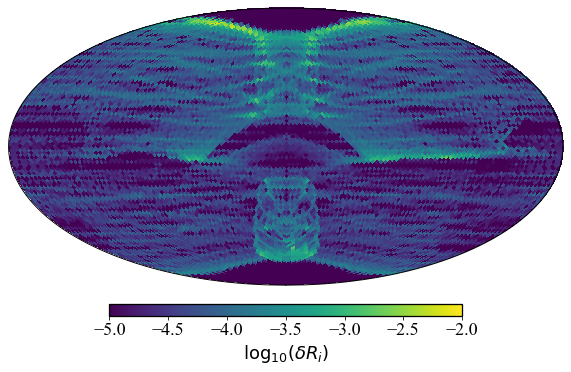

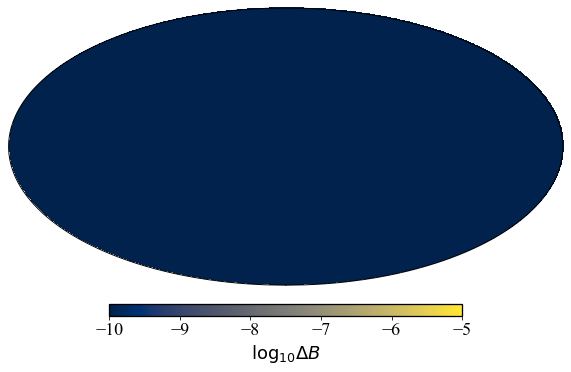

In [4]:
fileN = "Minicluster_PeriodAvg_MassAx_1.0e-5_ThetaM_0.0001_rotPulsar_1.0_B0_1.0e14_rNS_10_MassNS_1_NS_Mag_0.00029_NS_Theta_1.571__.npz"
nside = 32
RadApp=False
sve=False
skymap(fileN, nside, RadApp=RadApp, minFlux=-5, maxFlux=-2, minB=-10, maxB=-5, sve=sve)

/Users/samuelwitte/.local/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/samuelwitte/.local/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/samuelwitte/.local/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 360 deg 0.00'.
  warnings.warn(
/Users/samuelwitte/.local/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 360 deg 0.00'.
  warnings.warn(


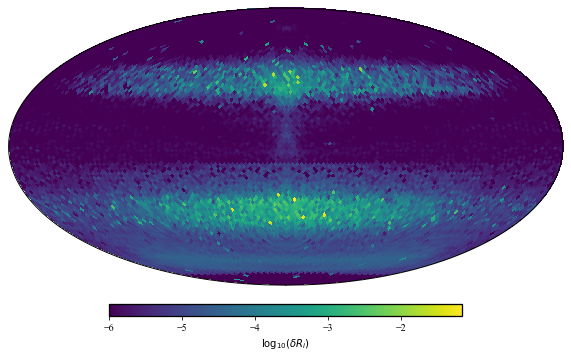

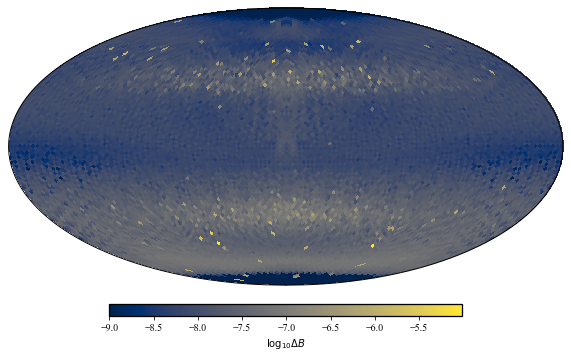

In [5]:
fileN = "Minicluster_PeriodAvg_MassAx_1.0e-6_ThetaM_0.2_rotPulsar_1.0_B0_1.0e14_rNS_10_MassNS_1NS_velX_0.0005NS_velZ_0.0005__.npz"
nside = 32
RadApp=False
skymap(fileN, nside, RadApp=RadApp,  minFlux=-6, minB=-9)

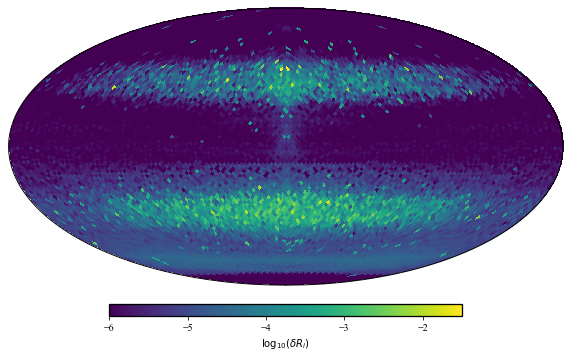

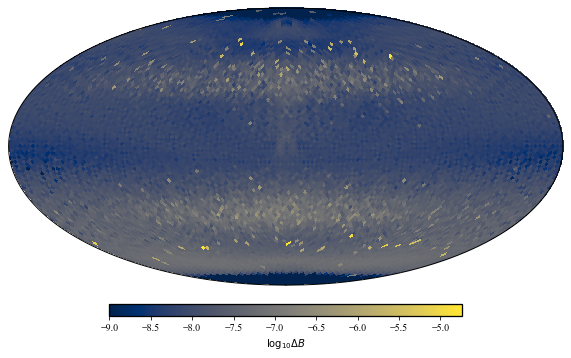

In [6]:
fileN = "Minicluster_PeriodAvg_MassAx_1.0e-6_ThetaM_0.2_rotPulsar_1.0_B0_1.0e14_rNS_10_MassNS_1NS_velX_0.0001NS_velZ_0.0001__.npz"
nside = 32
RadApp=False
skymap(fileN, nside, RadApp=RadApp,  minFlux=-6, minB=-9)

<ipython-input-2-ce15a66069d6>:84: RuntimeWarning: invalid value encountered in log10
  hp.mollview(np.log10(rateSky), min=minFlux, max=maxFlux,  unit=r"$\log_{{10}}\left(R_{{i}}/R_{{\rm tot}} \right)$",xsize=2000,cmap=cmap1)
/Users/samuelwitte/.local/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


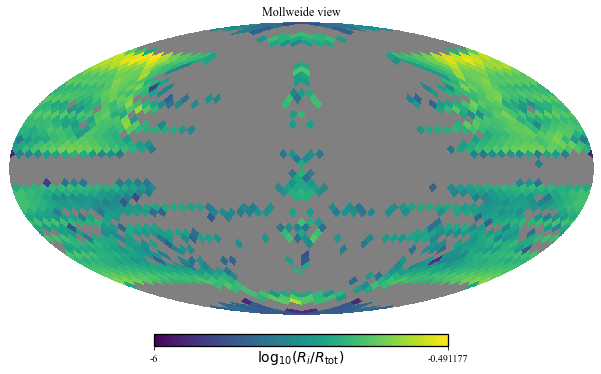

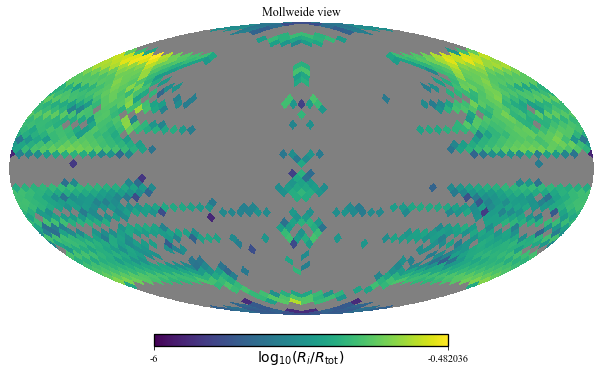

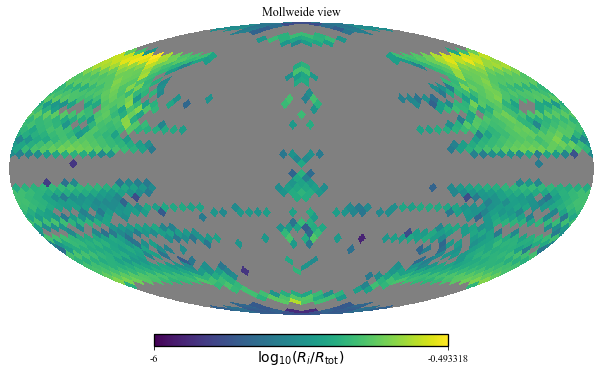

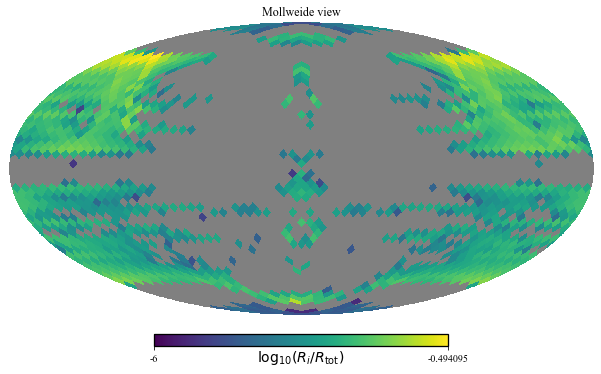

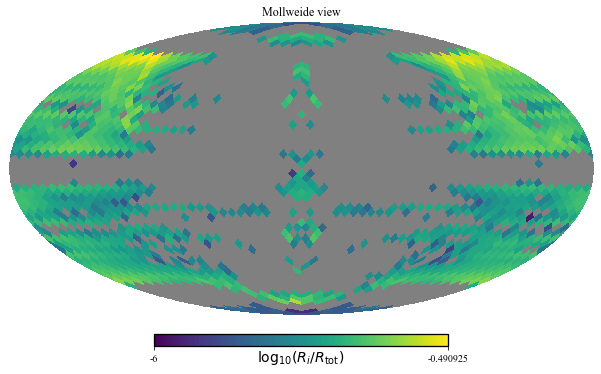

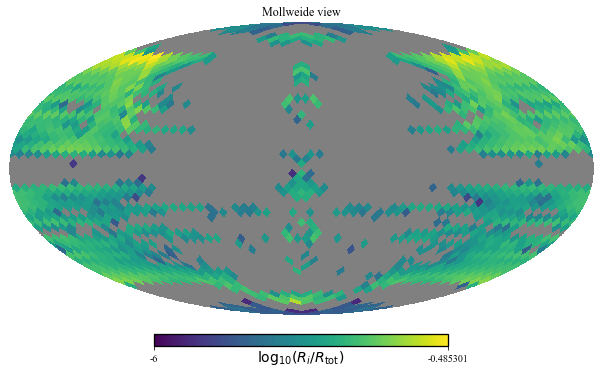

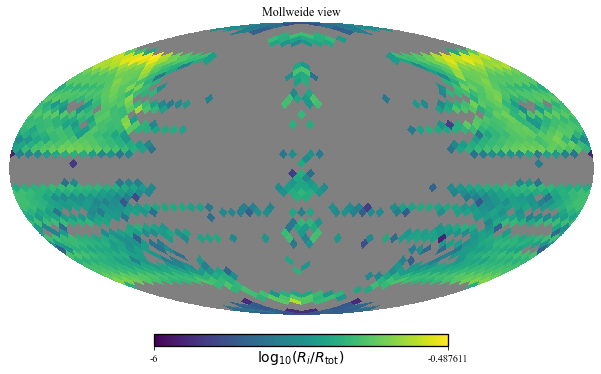

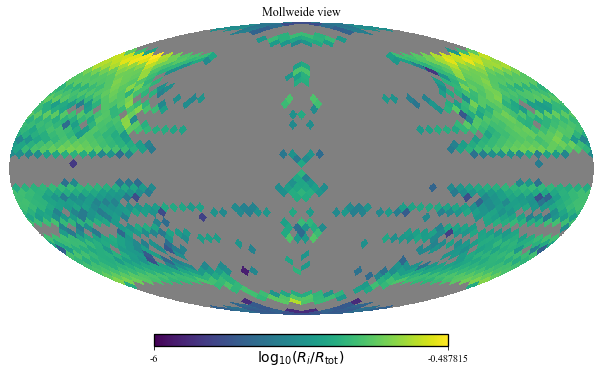

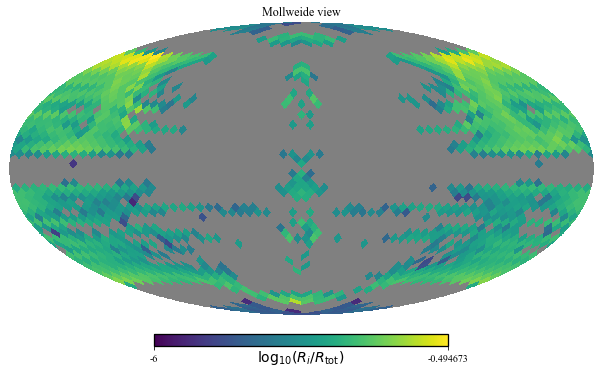

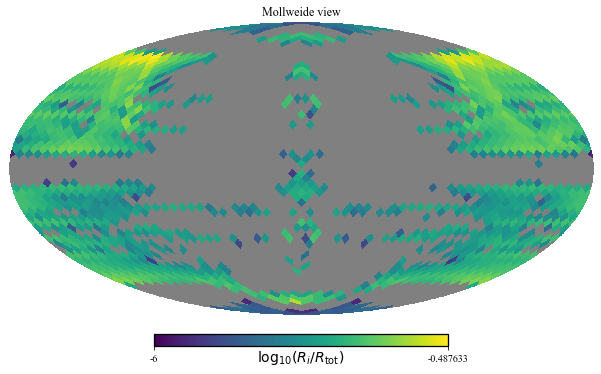

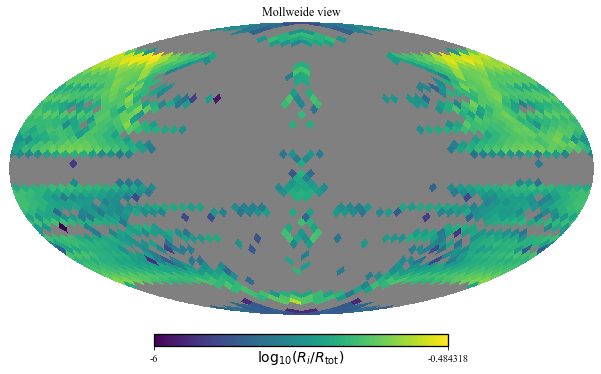

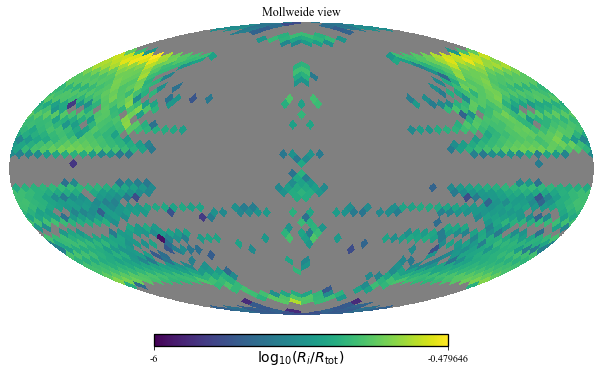

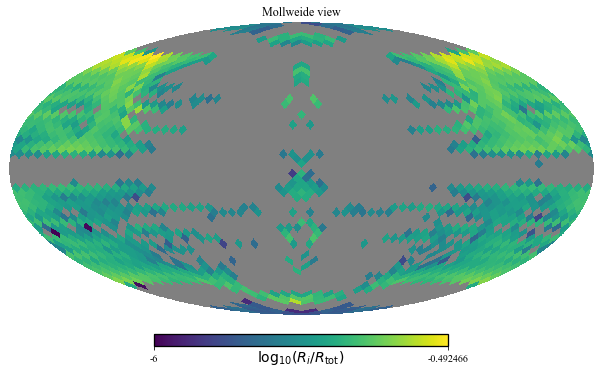

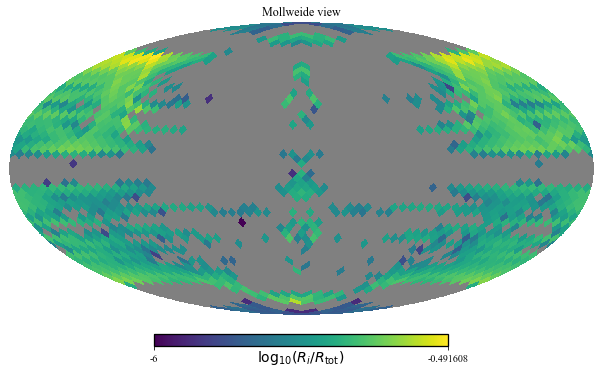

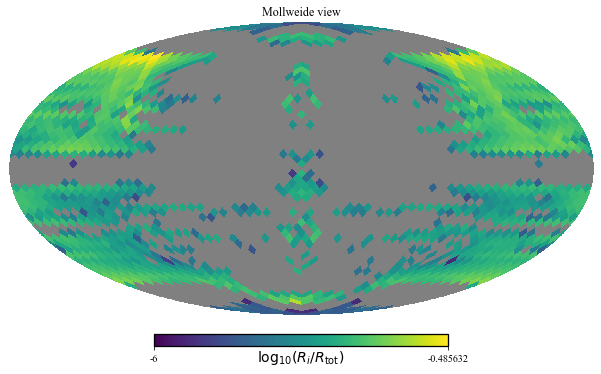

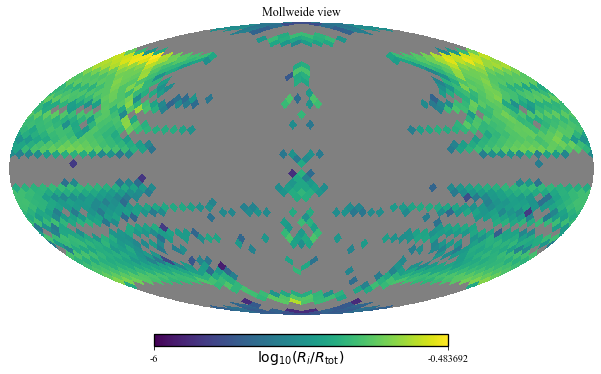

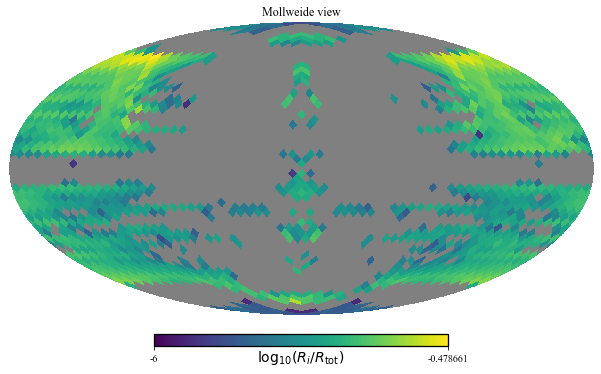

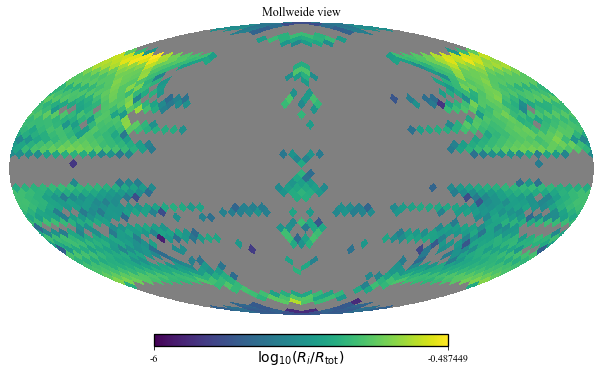

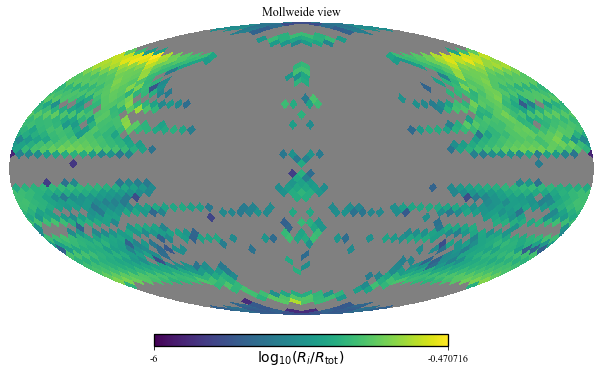

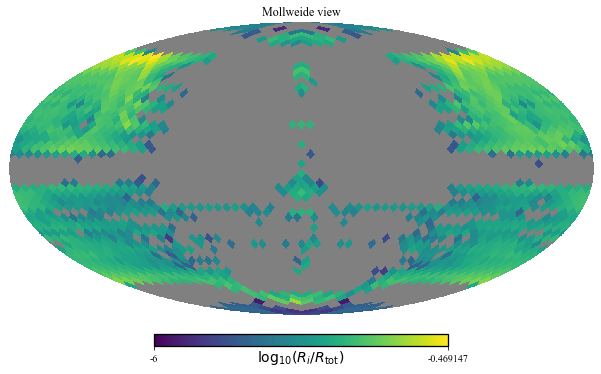

In [6]:
fileN = "Minicluster_Time_0.0_MassAx_1.0e-5_ThetaM_0.0001_rotPulsar_1.0_B0_1.0e14_rNS_10_MassNS_1_NS_Mag_0.00029_NS_Theta_1.571__.npz"
nside = 16
RadApp=False
time_evolve_skymap(fileN, nside, RadApp=RadApp, minFlux=-6, minB=-9)